In [8]:
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")
library(digar.txts,lib.loc="R_pckg/")

* checking for file ‘/tmp/RtmpZj4bJo/remotesfc5b23d8219d/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



In [9]:
library(tidyverse)
install.packages('tidytext', lib='~/R_pckg')
library(tidytext, lib.loc='~/R_pckg')

In [10]:
all_issues <- get_digar_overview()

[1] "Issue metadata read"


In [11]:
valiseesti_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti" | keyid=="eestipost" | keyid=="vabaeestlane" | keyid=="vabaeestisona" | keyid=="meiekodu" | keyid=="voitleja")

In [12]:
# Search for lemmas
searchterm <- "balti"
searchfile <- "balti_lemmas.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, valiseesti_ajalehed, searchtype="lemmas", source="pages")

In [14]:
subset_meta <- get_subset_meta(valiseesti_ajalehed, source="pages")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpZj4bJo/filefc5b4eb2da5c' has size 0. Returning a NULL data.table.”


In [15]:
# Read lemma answers
texts <- fread("balti_lemmas.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta <- texts %>% select(id, DocumentID) %>% left_join(valiseesti_ajalehed %>% select(keyid,year,month,DocumentID, zippath_sections,zippath_pages),by=c("DocumentID"))

In [16]:
# Get matching files and merge with document
get_matching_files(fileids_w_meta,"balti_text_via_lemmas.txt","pages","text")
texts_matching <- fread("balti_text_via_lemmas.txt",header=F,sep="\t", quote="")[,.(id=V1,txt=V2)]
text_and_lemmas <- merge(texts,texts_matching,by="id")

In [17]:
sonad_aastad_balti <- fileids_w_meta %>% 
  count(year) %>% mutate(set="balti")

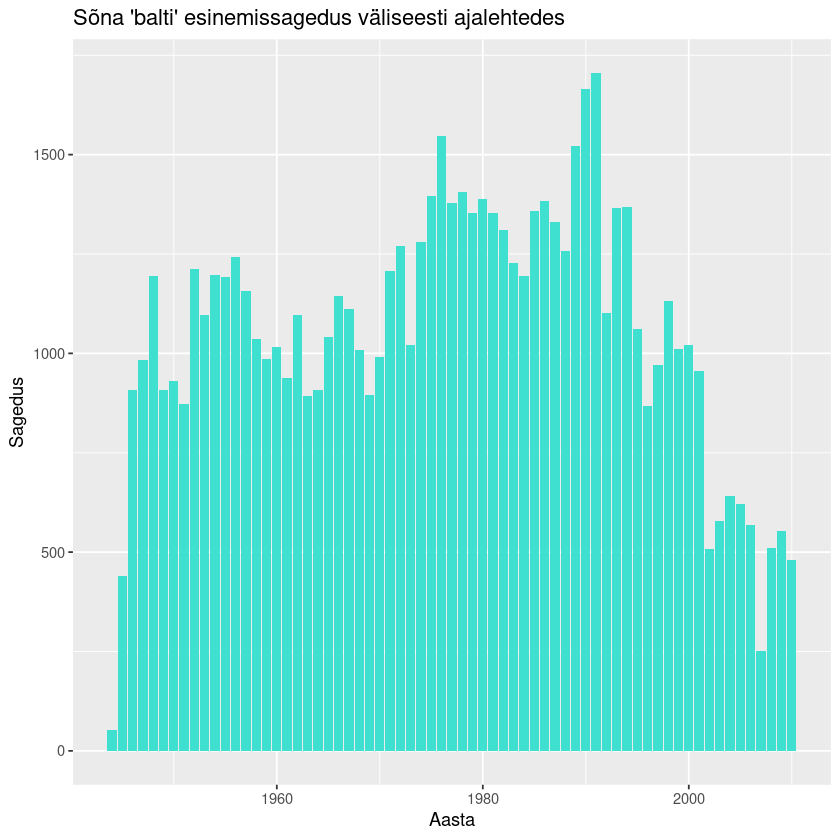

In [18]:
ggplot(data = sonad_aastad_balti, aes(x = year, y = n)) +
  geom_bar(stat = "identity", fill = "turquoise") +
  labs(x = "Aasta",
       y = "Sagedus",
       title = "Sõna 'balti' esinemissagedus väliseesti ajalehtedes")

In [36]:
balti_concs <- get_concordances(searchterm=searchterm,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [37]:
balti_trigrammid <- balti_concs %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 3) %>% 
  count(word,sort=T)

In [38]:
balti_trigrammid

word,n
<chr>,<int>
kolm balti riik,1785
ja teine balti,1603
liidu liidud liit,1578
balti riik küsimus,1478
teine balti riik,1475
eesti ja teine,1165
n liidu liidud,1164
läti ja leedu,1036
balti riik ja,1007


In [22]:
balti_ngrammid <- balti_concs %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 2) %>% 
  count(word,sort=T)

In [23]:
balti_ngrammid

word,n
<chr>,<int>
balti riik,34108
balti rahvas,10468
kolm balti,4666
teine balti,4223
ja balti,4049
balti vabariik,3555
ka balti,3211
olema balti,3188
ja teine,2978


In [24]:
# Search for lemmas
searchterm2 <- "läti"
searchfile2 <- "lati_lemmas.txt"
do_subset_search(searchterm=searchterm2, searchfile=searchfile2, valiseesti_ajalehed, searchtype="lemmas", source="pages")

In [25]:
# Read lemma answers
texts <- fread("lati_lemmas.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta2 <- texts %>% select(id, DocumentID) %>% left_join(valiseesti_ajalehed %>% select(keyid,year,month,DocumentID, zippath_sections,zippath_pages),by=c("DocumentID"))

In [26]:
# Get matching files and merge with document
get_matching_files(fileids_w_meta2,"lati_text_via_lemmas.txt","pages","text")
texts_matching2 <- fread("lati_text_via_lemmas.txt",header=F,sep="\t", quote="")[,.(id=V1,txt=V2)]
text_and_lemmas2 <- merge(texts,texts_matching,by="id")

In [39]:
lati_concs <- get_concordances(searchterm=searchterm2,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [40]:
lati_ngrammid <- lati_concs %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 2) %>% 
  count(word,sort=T)

In [41]:
lati_ngrammid

word,n
<chr>,<int>
läti ja,4633
ja leedu,3898
läti ja leedu,3687
eesti läti,3558
eesti läti ja,2720
ja läti,1702
eesti ja,960
läti leedu,887
eesti ja läti,771


In [30]:
# Search for lemmas
searchterm3 <- "leedu"
searchfile3 <- "leedu_lemmas.txt"
do_subset_search(searchterm=searchterm3, searchfile=searchfile3, valiseesti_ajalehed, searchtype="lemmas", source="pages")

In [31]:
# Read lemma answers
texts <- fread("leedu_lemmas.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta3 <- texts %>% select(id, DocumentID) %>% left_join(valiseesti_ajalehed %>% select(keyid,year,month,DocumentID, zippath_sections,zippath_pages),by=c("DocumentID"))

In [32]:
# Get matching files and merge with document
get_matching_files(fileids_w_meta3,"leedu_text_via_lemmas.txt","pages","text")
texts_matching3 <- fread("leedu_text_via_lemmas.txt",header=F,sep="\t", quote="")[,.(id=V1,txt=V2)]
text_and_lemmas3 <- merge(texts,texts_matching,by="id")

In [42]:
leedu_concs <- get_concordances(searchterm=searchterm3,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [43]:
leedu_ngrammid <- leedu_concs %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 2) %>% 
  count(word,sort=T)

In [44]:
leedu_ngrammid

word,n
<chr>,<int>
ja leedulane,6141
lätlane ja,5451
ja leedu,5201
lätlane ja leedulane,4743
läti ja,4205
läti ja leedu,3762
eestlane lätlane,3712
eesti läti,3227
eestlane lätlane ja,2998
